In [81]:
import os
import pickle as pkl
from random import seed

import numpy as np
import pandas as pd
import torch
seed(1234)
np.random.seed(1234)
torch.random.manual_seed(1234)

In [95]:
model = pkl.load(open('models/scASTRAL_final_pipeline.pkl','rb'))
response = pd.read_csv('data/afatinib.csv')
to_test = ['SUM149PT','HCC38','HCC70','CAL851',
 'BT20','HCC1937','HDQP1','SUM229PE',
 'BT549','CAL51','HCC1143','SUM159PT','SUM185PE',
 'HCC1187','MDAMB436','SUM1315MO2']

In [96]:
response['cl'] = [p.replace('-','') for p in response['Cell line']]
response['logIC50'] = np.log2(response['IC50'])
response = response.loc[ [p in to_test for p in response['cl']] ,['cl','logIC50'] ]
response['pct_pred']=np.nan

In [103]:
for file in os.listdir('data/cell_line'):
    cell_line,extension = file.split('.')
    if extension == 'csv' and cell_line in to_test:
        df = pd.read_csv(f"data/cell_line/{file}",index_col=0)
        pred = model.predict_proba(df)
        pos = (pred[:,1] >= .95).sum()
        neg = (pred[:,1] < .1).sum()
        response.loc[response['cl']==cell_line,'pct_pred']=pos/(pos+neg)


In [105]:
response[['logIC50','pct_pred']].corr()

,logIC50,pct_pred
logIC50,1.000000,0.613285
pct_pred,0.613285,1.000000


<Axes: xlabel='pct_pred', ylabel='logIC50'>

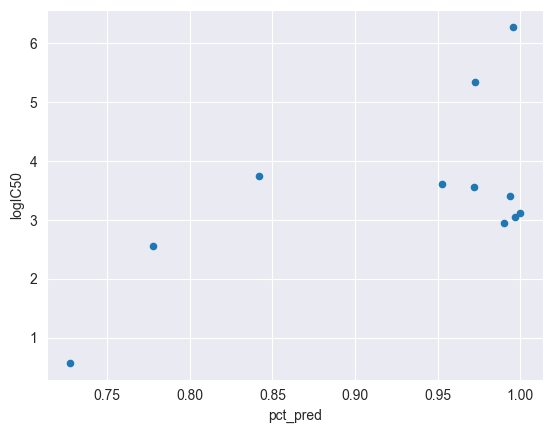

In [106]:
response.plot.scatter(y='logIC50',x='pct_pred')